# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Imelda Cyntia
- **Email:** imeldacyntia@gmail.com
- **ID Dicoding:** MC189D5X0429

## Menentukan Pertanyaan Bisnis

- Apakah rata-rata penyewaan sepeda lebih tinggi pada hari kerja atau akhir pekan?
- Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana perbedaan pola penyewaan sepeda antara pengguna casual dan registered pada berbagai jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [160]:
# Impor pustaka NumPy untuk operasi numerik serta manipulasi data
import numpy as np
# Impor pustaka Pandas untuk manipulasi serta analisis data tabular
import pandas as pd
# Impor pustaka Matplotlib untuk membuat visualisasi data
import matplotlib.pyplot as plt
# Impor pustaka Seaborn untuk membuat visualisasi data statistik
import seaborn as sns

## Data Wrangling

### Gathering Data

In [161]:
# Mengimpor modul files dari Google Colab untuk mengunggah file
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [162]:
# Membaca file CSV ke dalam DataFrame
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

# Menampilkan 5 baris pertama dari setiap dataset dengan tampilan yang lebih rapi
print("\nPreview Data Harian (day.csv):")
print(df_day.head(), "\n")

print("Preview Data Per Jam (hour.csv):")
print(df_hour.head())


Preview Data Harian (day.csv):
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1

**Insight:**


**1.   Struktur dataset**

Dataset ini terdiri dari dua file utama, yaitu:
*   day.csv yang berisikan data penggunaan sepeda berdasarkan hari (dteday).
*   hour.csv yang berisikan data penggunaan setiap jam (hr) dalam sehari.


**2.   Variabel dalam dataset**

a) Variabel waktu

*   dteday = Tanggal pencatatan berdasarkan hari
*   season = Musim (1 = semi, 2 = panas, 3 = gugur, 4 = dingin)
*   yr = Tahun (0 = 2011, 1 = 2012)
*   mnth = Bulan (1-12)
*   hr = Jam dalam sehari (hanya ada di dataset hour.csv)
*   weekday = Hari dalam seminggu (0 = Minggu, 6 = Sabtu)
*   holiday = Indikator apakah hari itu libur (1 = libur, 0 = bukan)
*   workingday = Indikator hari kerja (1 = hari kerja, 0 = bukan)

b) Variabel cuaca

*   weathersit = Kondisi cuaca (1 = cerah, 4 = buruk)
*   temp = Suhu dalam skala normalisasi (0-1)
*   atemp = Suhu yang dirasakan dalam skala normalisasi (0-1)
*   hum = Kelembaban udara (0-1)
*   windspeed = Kecepatan angin (0-1)

c) Variabel penyewaan sepeda

*   casual = Jumlah pengguna sepeda tidak terdaftar
*   registered → Jumlah pengguna sepeda yang terdaftar
*   cnt → Total penyewaan sepeda (casual + registered)


**3.   Observasi awal**

Dataset ini berisi informasi yang cukup lengkap tentang pola penggunaan sepeda, mencakup data harian dan per jam, kondisi cuaca, serta kategori pengguna. Dengan adanya fitur waktu seperti hari, jam, dan musim, sehingga dapat menganalisis tren penyewaan sepeda, termasuk bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan hari libur. Selain itu, variabel cuaca seperti suhu, kelembaban, kecepatan angin, dan kondisi cuaca memungkinkan kita untuk mengevaluasi seberapa besar pengaruh faktor lingkungan terhadap jumlah penyewaan sepeda. Selain itu, dataset ini membedakan antara pengguna casual (tidak terdaftar) dan registered (terdaftar), yang membuka peluang untuk memahami bagaimana kebiasaan kedua jenis pengguna ini berbeda.

### Assessing Data

**Menilai tabel df_day**

In [163]:
# Memberikan informasi tentang DataFrame 'df_day'
print("Informasi DataFrame df_day:")
df_day.info()

Informasi DataFrame df_day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [164]:
# Menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom DataFrame 'df_day'
print("Jumlah Missing Values:")
print(df_day.isna().sum())

Jumlah Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [165]:
# Mencetak jumlah duplikasi dalam DataFrame 'df_day'
print("Jumlah Data Duplikat:", df_day.duplicated().sum())

Jumlah Data Duplikat: 0


In [166]:
# Mencetak ringkasan statistik dari setiap kolom dalam DataFrame 'df_day'
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight dari tabel df_day:**

**1.   Struktur data**

*   Dataset ini berisi 731 baris dan 16 kolom.
*   Tidak ada missing values dan tidak ada duplikasi.
*   Kolom dteday masih berupa object, sebaiknya dikonversi ke datetime agar lebih mudah diolah.
*   Variabel target (cnt) merepresentasikan total jumlah sepeda yang disewa per hari.


**2.   Distribusi data**

a) Jumlah penyewaan sepeda (cnt)

*   Rata-rata: 4.504 penyewaan sepeda per hari
*   Min: 22 penyewaan sepeda per hari
*   Max: 8.714 penyewaan sepeda per hari

b) Pengguna casual dibandingkan registered

*   Casual (pengguna tidak terdaftar): Rata-rata penyewaan 848 per hari, max 3.410 penyewaan per hari
*   Registered (pengguna terdaftar): Rata-rata penyewaan 3.656 per hari, max 6.946 penyewaan per hari

c) Faktor cuaca

*   Weather Situation (weathersit): 1 (Cerah), 2 (Berawan), 3 (Hujan Ringan), 4 (Hujan Lebat)
*   Mayoritas data berada pada cuaca cerah atau berawan

**Menilai tabel df_hour**

In [167]:
# Memberikan informasi tentang DataFrame 'df_hour'
print("Informasi DataFrame df_hour:")
df_hour.info()

Informasi DataFrame df_hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [168]:
# Menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom DataFrame 'df_hour'
print("Jumlah Missing Values:")
print(df_hour.isna().sum())

Jumlah Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [169]:
# Mencetak jumlah duplikasi dalam DataFrame 'df_hour'
print("Jumlah Data Duplikat:", df_hour.duplicated().sum())

Jumlah Data Duplikat: 0


In [170]:
# Mencetak ringkasan statistik dari setiap kolom dalam DataFrame 'df_hour'
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight dari tabel df_hour:**

**1.   Struktur data**

*   Dataset berisi 17.379 baris dan 17 kolom.
*   Tidak ada missing values dan tidak ada duplikasi.
*   Kolom dteday masih berupa object, sebaiknya dikonversi ke datetime.


**2.   Distribusi data**

a) Jumlah penyewaan sepeda (cnt)

*   Rata-rata: 189 penyewaan sepeda per jam
*   Min: 1 penyewaan sepeda/jam
*   Max: 977 penyewaan sepeda/jam

b) Pengguna casual dibandingkan registered

*   Casual (pengguna tidak terdaftar): Rata-rata 35 penyewaan sepeda per jam, max 367 penyewaan sepeda per jam
*   Registered (pengguna terdaftar): Rata-rata 153 penyewaan sepeda per jam, max 886 penyewaan sepeda per jam

c) Faktor cuaca

*   Temperatur (temp) dan kelembaban (hum) memiliki rentang normalisasi (0 - 1)
*   Weather Situation (weathersit) juga memiliki variasi dari cerah hingga hujan lebat yang dapat mempengaruhi pola penyewaan sepeda.

### Cleaning Data

**Cleaning data harian (df_day)**

In [171]:
# Menghapus kolom yang tidak diperlukan
df_day.drop(columns=['instant', 'atemp'], inplace=True)

In [172]:
# Mengubah kolom dteday ke datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [173]:
# Menentukan kolom numerik yang berpotensi memiliki outlier
num_cols = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Menghitung IQR untuk setiap kolom numerik
Q1 = df_day[num_cols].quantile(0.25)
Q3 = df_day[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data dengan menghapus outlier
df_day_cleaned = df_day[~((df_day[num_cols] < lower_bound) | (df_day[num_cols] > upper_bound)).any(axis=1)]

# Menampilkan jumlah data sebelum dan sesudah penghapusan outlier
print(f"Jumlah data sebelum menghapus outlier: {len(df_day)}")
print(f"Jumlah data setelah menghapus outlier: {len(df_day_cleaned)}")

Jumlah data sebelum menghapus outlier: 731
Jumlah data setelah menghapus outlier: 673


**Insight dari cleaning data harian (df_day):**

Dalam proses analisis data, kualitas data yang digunakan sangat berpengaruh terhadap hasil akhir. Oleh karena itu, langkah cleaning data menjadi krusial untuk memastikan bahwa data yang dianalisis bebas dari informasi yang tidak relevan, inkonsistensi, serta nilai ekstrem yang dapat mengganggu hasil analisis. Berikut adalah langkah-langkah yang telah dilakukan dalam proses pembersihan data harian (df_day).

**1.   Penghapusan Kolom Tidak Diperlukan**

Beberapa kolom dalam dataset dihapus untuk menyederhanakan analisis dan menghilangkan informasi yang tidak relevan. Kolom instant dan atemp dihapus karena tidak memberikan kontribusi langsung terhadap analisis. Selain itu, kolom dteday dikonversi ke format datetime agar lebih mudah digunakan dalam analisis berbasis waktu.

**2.   Deteksi dan Penghapusan Outlier**

Untuk memastikan bahwa data yang digunakan bersih dan akurat, dilakukan deteksi outlier pada fitur numerik seperti temp, hum, windspeed, casual, registered, dan cnt menggunakan metode Interquartile Range (IQR). Data yang memiliki nilai ekstrem di luar batas bawah dan batas atas IQR dianggap sebagai outlier dan dihapus. Setelah proses ini, jumlah data berkurang dari 731 menjadi 673, menunjukkan bahwa ada beberapa nilai ekstrem yang telah dieliminasi.

**3.   Manfaat Cleaning Data**

Proses cleaning data sangat penting dalam analisis karena dapat meningkatkan kualitas data yang digunakan. Dengan menghapus kolom yang tidak relevan, dataset menjadi lebih ringkas dan mudah dianalisis. Selain itu, penghapusan outlier membantu menghilangkan potensi gangguan yang dapat menyebabkan hasil analisis menjadi bias atau tidak akurat.

**Cleaning data per jam (df_hour)**

In [174]:
# Menghapus kolom yang tidak diperlukan
df_hour.drop(columns=['instant', 'atemp'], inplace=True)

In [175]:
# Mengubah kolom dteday ke datetime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [176]:
# Menentukan kolom numerik yang berpotensi memiliki outlier
num_cols = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Menghitung IQR untuk setiap kolom numerik
Q1 = df_hour[num_cols].quantile(0.25)
Q3 = df_hour[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data dengan menghapus outlier
df_hour_cleaned = df_hour[~((df_hour[num_cols] < lower_bound) | (df_hour[num_cols] > upper_bound)).any(axis=1)]

# Menampilkan jumlah data sebelum dan sesudah penghapusan outlier
print(f"Jumlah data sebelum menghapus outlier: {len(df_hour)}")
print(f"Jumlah data setelah menghapus outlier: {len(df_hour_cleaned)}")

Jumlah data sebelum menghapus outlier: 17379
Jumlah data setelah menghapus outlier: 15220


In [177]:
# Normalisasi fitur numerik
from sklearn.preprocessing import MinMaxScaler

# Buat salinan DataFrame untuk menghindari SettingWithCopyWarning
df_hour_cleaned = df_hour.copy()

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur numerik
df_hour_cleaned[['temp', 'hum', 'windspeed']] = scaler.fit_transform(df_hour_cleaned[['temp', 'hum', 'windspeed']])

# Cek hasil normalisasi
df_hour_cleaned.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.224490,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.204082,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.204082,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.224490,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.224490,0.75,0.0,0,1,1


**Insight dari cleaning data harian (df_day):**

Dalam proses analisis data, kualitas data yang digunakan sangat berpengaruh terhadap hasil akhir. Oleh karena itu, langkah cleaning data menjadi krusial untuk memastikan bahwa data yang dianalisis bebas dari informasi yang tidak relevan, inkonsistensi, serta nilai ekstrem yang dapat mengganggu hasil analisis. Berikut adalah langkah-langkah yang telah dilakukan dalam proses pembersihan data per jam (df_hour).

**1.   Penghapusan Kolom Tidak Diperlukan**

Beberapa kolom dalam dataset dihapus untuk menyederhanakan analisis dan menghilangkan informasi yang tidak relevan. Kolom 'instant' dan 'atemp' dihapus karena tidak memberikan kontribusi langsung terhadap analisis. Selain itu, kolom 'dteday' dikonversi ke format datetime agar lebih mudah digunakan dalam analisis berbasis waktu.

**2.   Deteksi dan Penghapusan Outlier**

Untuk memastikan bahwa data yang digunakan bersih dan akurat, dilakukan deteksi outlier pada fitur numerik seperti 'temp', 'hum', 'windspeed', 'casual', 'registered', dan 'cnt' menggunakan metode Interquartile Range (IQR). Data yang memiliki nilai ekstrem di luar batas bawah dan batas atas IQR dianggap sebagai outlier dan dihapus. Setelah proses ini, jumlah data berkurang dari 17.379 menjadi 15.220, menunjukkan bahwa ada 2.159 baris data dengan nilai ekstrem yang telah dieliminasi.

**3.   Normalisasi Fitur Numerik**

Setelah pembersihan outlier, dilakukan proses normalisasi pada fitur numerik 'temp', 'hum', dan 'windspeed' menggunakan MinMaxScaler dari sklearn.preprocessing. Normalisasi ini bertujuan untuk menyamakan skala fitur agar memiliki rentang nilai antara 0 hingga 1, sehingga dapat meningkatkan kinerja dalam tahap analisis lebih lanjut.

**4.   Manfaat Cleaning Data**

Proses cleaning data sangat penting dalam analisis karena dapat meningkatkan kualitas data yang digunakan. Dengan menghapus kolom yang tidak relevan, dataset menjadi lebih ringkas dan mudah dianalisis. Penghapusan outlier membantu menghilangkan potensi gangguan yang dapat menyebabkan hasil analisis menjadi bias atau tidak akurat. Selain itu, proses normalisasi memungkinkan fitur numerik memiliki skala yang seragam, yang sangat bermanfaat untuk metode analisis. Dengan data yang telah dibersihkan dan dinormalisasi, hasil analisis menjadi lebih akurat dan dapat diandalkan.



### Explore ...

## Exploratory Data Analysis (EDA)

In [178]:
# Menggabungkan data frame harian dan per jam
bike_df = df_hour_cleaned.merge(df_day_cleaned, on='dteday', how='inner', suffixes=('_hour', '_day'))

# Menampilkan 5 data teratas
bike_df.head()

,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,2011-01-01,1,0,1,0,0,6,0,1,0.224490,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2011-01-01,1,0,1,1,0,6,0,1,0.204082,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
2,2011-01-01,1,0,1,2,0,6,0,1,0.204082,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
3,2011-01-01,1,0,1,3,0,6,0,1,0.224490,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
4,2011-01-01,1,0,1,4,0,6,0,1,0.224490,...,0,6,0,2,0.344167,0.805833,0.160446,331,654,985


In [179]:
# Membuat kamus untuk mengubah kode cuaca menjadi label deskriptif
weather_mapping = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}

# Menambahkan label cuaca berdasarkan nilai 'weathersit_day'
bike_df['weather_label'] = bike_df['weathersit_day'].map(weather_mapping)

# Menampilkan beberapa data pertama
bike_df[['dteday', 'weathersit_day', 'weather_label']].head()

,dteday,weathersit_day,weather_label
0,2011-01-01,2,Berawan
1,2011-01-01,2,Berawan
2,2011-01-01,2,Berawan
3,2011-01-01,2,Berawan
4,2011-01-01,2,Berawan


In [180]:
# Menampilkan statistik deskriptif lengkap termasuk kolom kategori
bike_df.describe(include='all')

,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_label
count,15989,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,...,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,15989.000000,15989
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10032
mean,2011-12-25 03:29:18.233785856,2.509100,0.477203,6.576646,11.549815,0.026768,2.969604,0.727187,1.435362,0.480702,...,2.969604,0.727187,1.400463,0.491088,0.632095,0.186209,744.419664,3653.319282,4397.738946,NaN
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.059130,0.275833,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-06-26 00:00:00,1.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.306122,...,1.000000,0.000000,1.000000,0.330000,0.524583,0.133721,309.000000,2501.000000,3126.000000,NaN
50%,2011-12-16 00:00:00,3.000000,0.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.489796,...,3.000000,1.000000,1.000000,0.485000,0.630833,0.177250,688.000000,3632.000000,4451.000000,NaN
75%,2012-06-28 00:00:00,4.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.632653,...,5.000000,1.000000,2.000000,0.654167,0.734167,0.230725,1033.000000,4728.000000,5668.000000,NaN
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.972500,0.378108,2258.000000,6946.000000,8173.000000,NaN


In [181]:
# Mengelompokkan data berdasarkan hari kerja dan akhir pekan, lalu menghitung rata-rata penyewaan sepeda harian
workingday_rentals = (
    bike_df.groupby('workingday_day')['cnt_day']
    .mean()
    .reset_index()
    .sort_values(by='cnt_day')
)

# Menampilkan hasil
workingday_rentals

,workingday_day,cnt_day
0,0,3759.132737
1,1,4637.319257


In [182]:
# Mengelompokkan berdasarkan kondisi cuaca dan menghitung rata-rata penyewaan sepeda harian
weather_rentals = (
    bike_df.groupby('weather_label')['cnt_day']
    .mean()
    .reset_index()
    .sort_values(by='cnt_day', ascending=True)
)

# Menampilkan hasil
weather_rentals

,weather_label,cnt_day
2,Hujan Ringan,1978.417040
0,Berawan,3931.581020
1,Cerah,4761.376695


In [183]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata jumlah penyewaan untuk pengguna casual dan registered
hourly_user_type = (
    bike_df.groupby('hr')[['casual_hour', 'registered_hour']]
    .mean()
    .reset_index()
)

# Menampilkan hasil
hourly_user_type.head(10)  # Menampilkan 10 data pertama

,hr,casual_hour,registered_hour
0,0,9.152695,39.904192
1,1,5.635135,23.554054
2,2,4.019787,15.508371
3,3,2.290625,7.837500
4,4,1.087500,4.925000
5,5,1.345979,19.136571
6,6,4.041979,75.431784
7,7,10.902840,211.790732
8,8,20.884903,352.245142
9,9,27.298954,188.783259


In [184]:
# Menjumlahkan total pengguna terdaftar dalam dataset
total_registered_users = bike_df['registered_hour'].sum()

# Menampilkan hasil
print(f"Total pengguna terdaftar dalam dataset: {total_registered_users}")

Total pengguna terdaftar dalam dataset: 2442174


**Insight:**

Berdasarkan hasil Exploratory Data Analysis (EDA), ditemukan bahwa penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan, mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama daripada untuk rekreasi. Cuaca juga memiliki pengaruh signifikan, di mana jumlah penyewaan tertinggi terjadi saat cuaca cerah dan menurun drastis saat hujan. Selain itu, terdapat perbedaan pola penyewaan antara pengguna casual dan registered, di mana pengguna registered lebih aktif pada jam sibuk (pagi dan sore), sedangkan pengguna casual lebih sering menyewa di siang hingga sore hari, terutama di akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah rata-rata penyewaan sepeda lebih tinggi pada hari kerja atau akhir pekan?

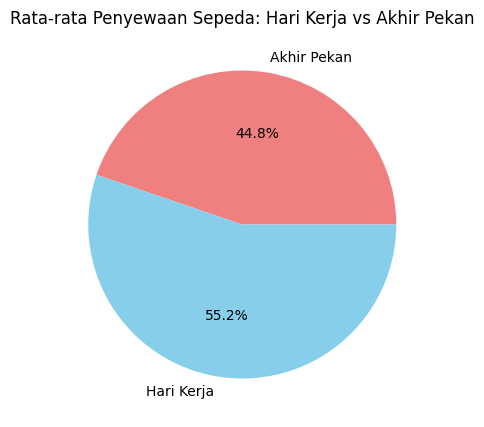

In [185]:
import matplotlib.pyplot as plt

# Menghitung rata-rata penyewaan sepeda pada hari kerja dan akhir pekan
avg_workingday = bike_df.groupby('workingday_day')['cnt_day'].mean()

# Labels
labels = ['Akhir Pekan', 'Hari Kerja']

# Plot
plt.figure(figsize=(8, 5))
plt.pie(avg_workingday, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])

# Judul
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')

# Tampilkan plot
plt.show()

**Insight:**

Hasil visualisasi menunjukkan bahwa rata-rata penyewaan sepeda lebih tinggi pada hari kerja (55.2%) dibandingkan dengan akhir pekan (44.8%). Hal ini menandakan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama untuk keperluan rutin seperti perjalanan ke kantor atau sekolah, dibandingkan sebagai sarana rekreasi di akhir pekan. Meskipun penyewaan pada akhir pekan masih cukup tinggi, penggunaannya lebih bersifat fleksibel dan tidak menunjukkan lonjakan yang signifikan.

### Pertanyaan 2: Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?

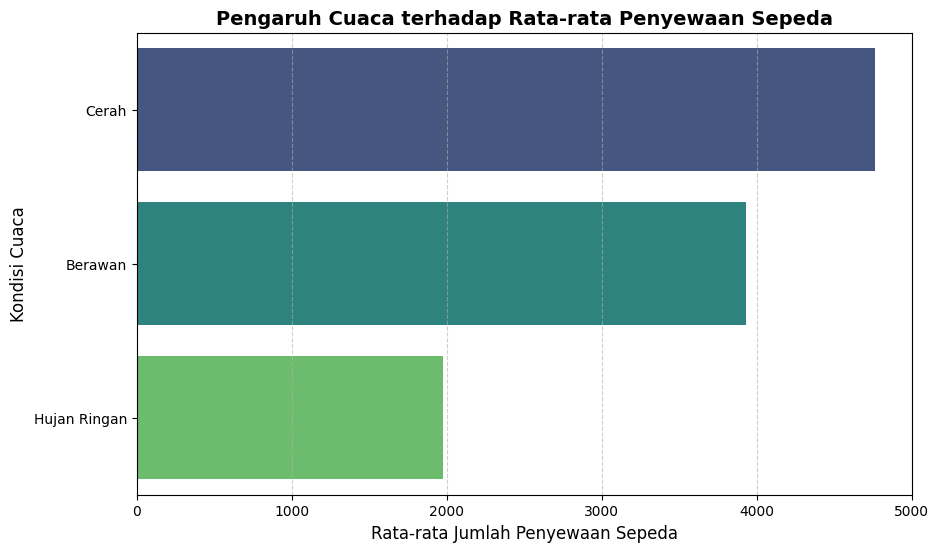

In [186]:
# Menghitung rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca
weather_impact = bike_df.groupby('weather_label')['cnt_day'].mean().reset_index()

# Mengurutkan berdasarkan jumlah penyewaan sepeda
weather_impact_sorted = weather_impact.sort_values("cnt_day", ascending=False)

# Membuat plot visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cnt_day', y='weather_label', data=weather_impact_sorted, hue='weather_label',
            palette='viridis', legend=False)

# Menambahkan judul dan label
plt.title('Pengaruh Cuaca terhadap Rata-rata Penyewaan Sepeda', fontsize=14, fontweight='bold')
plt.xlabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)
plt.ylabel('Kondisi Cuaca', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, 5000)

# Menampilkan plot
plt.show()

**Insight:**

Berdasarkan hasil visualisasi, analisis terhadap pengaruh cuaca menunjukkan bahwa jumlah penyewaan sepeda mengalami perubahan yang signifikan tergantung pada kondisi cuaca. Penyewaan tertinggi terjadi saat cuaca cerah, dengan rata-rata hampir 5000 pengguna per hari. Pada kondisi berawan, jumlah penyewa mengalami sedikit penurunan, dengan rata-rata sekitar 3700–4000 pengguna. Sementara itu, saat terjadi hujan ringan, jumlah penyewa sepeda turun drastis hingga mendekati 2000 pengguna. Hal ini mengindikasikan bahwa kenyamanan dan keamanan dalam berkendara sangat memengaruhi keputusan seseorang untuk menggunakan sepeda, di mana kondisi hujan menjadi penghambat utama. Tidak adanya data untuk hujan lebat juga menunjukkan kemungkinan bahwa hampir tidak ada penyewaan dalam kondisi cuaca ekstrem.

### Pertanyaan 3: Bagaimana perbedaan pola penyewaan sepeda antara pengguna casual dan registered pada berbagai jam dalam sehari?

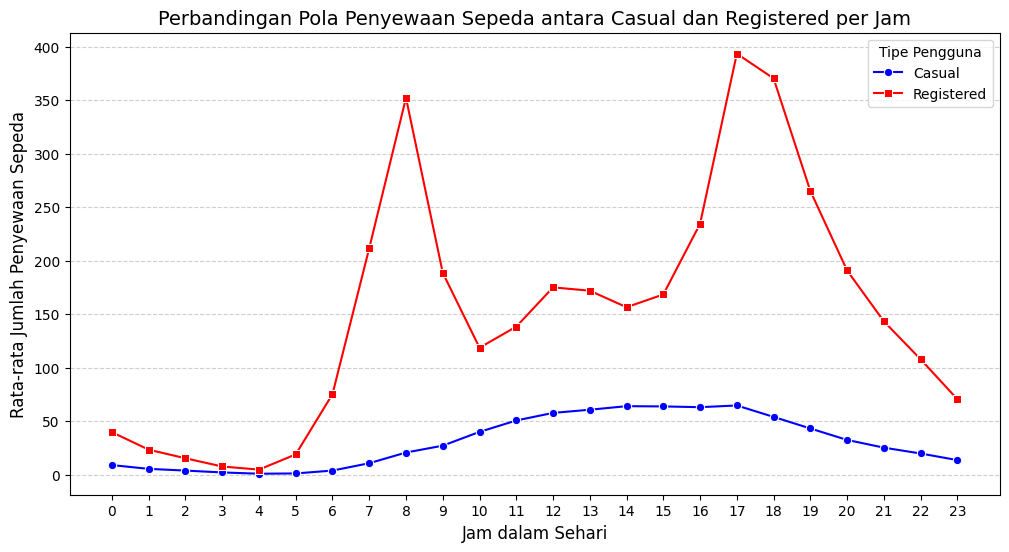

In [187]:
# Menghitung rata-rata penyewaan sepeda berdasarkan jam untuk pengguna casual dan registered
hourly_trend = bike_df.groupby('hr')[['casual_hour', 'registered_hour']].mean().reset_index()

# Rename 'hr' column to 'hour' for consistency
hourly_trend = hourly_trend.rename(columns={'hr': 'hour'})

# Membuat plot visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='casual_hour', data=hourly_trend, label='Casual', marker='o', color='blue')
sns.lineplot(x='hour', y='registered_hour', data=hourly_trend, label='Registered', marker='s', color='red')

# Menambahkan judul dan label
plt.title('Perbandingan Pola Penyewaan Sepeda antara Casual dan Registered per Jam', fontsize=14)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(range(0, 24))  # Menampilkan semua jam dalam sehari
plt.legend(title="Tipe Pengguna")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Menampilkan plot
plt.show()

**Insight:**

Berdasarkan hasil visualisasi, terlihat bahwa pola penggunaan sepeda oleh pengguna registered dan casual memiliki perbedaan yang cukup signifikan. Pengguna registered menunjukkan dua puncak utama dalam penyewaan sepeda, yaitu pada pagi hari sekitar pukul 07:00 - 08:00 dan sore hari sekitar pukul 17:00 - 18:00, yang kemungkinan besar berkaitan dengan jam perjalanan kerja atau sekolah. Sementara itu, pengguna casual memiliki pola yang lebih merata sepanjang hari, dengan sedikit peningkatan pada siang hingga sore hari, menunjukkan bahwa mereka lebih cenderung menggunakan sepeda untuk rekreasi atau keperluan pribadi yang lebih fleksibel.

## Conclusion

**Conclution pertanyaan 1**

Rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, yang menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi utama untuk keperluan rutin seperti perjalanan ke kantor atau sekolah. Meskipun penyewaan pada akhir pekan tetap tinggi, penggunaannya lebih bersifat fleksibel dan rekreasional, tanpa lonjakan signifikan seperti yang terlihat pada hari kerja. Temuan ini mengindikasikan bahwa layanan penyewaan sepeda dapat menyesuaikan strategi operasional, misalnya dengan memastikan ketersediaan sepeda lebih banyak pada jam sibuk di hari kerja dan menawarkan promosi akhir pekan untuk menarik lebih banyak pengguna rekreasional.





**Conclution pertanyaan 2**

Secara keseluruhan, Cuaca memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda, di mana semakin buruk kondisi cuaca, semakin sedikit jumlah penyewa. Penyewaan sepeda mencapai angka tertinggi saat cuaca cerah, mengalami sedikit penurunan pada kondisi berawan, dan menurun drastis ketika hujan ringan. Hal ini mengindikasikan bahwa faktor kenyamanan dan keamanan sangat memengaruhi keputusan seseorang dalam menggunakan sepeda. Tidak adanya data penyewaan pada saat hujan lebat menunjukkan bahwa hampir tidak ada pengguna yang bersedia menyewa sepeda dalam kondisi cuaca ekstrem.




**Conclution pertanyaan 3**

Secara keseluruhan, pola penyewaan sepeda menunjukkan bahwa pengguna registered lebih dipengaruhi oleh jadwal kerja atau sekolah, dengan lonjakan signifikan pada jam sibuk pagi dan sore hari. Sebaliknya, pengguna casual memiliki pola penyewaan yang lebih fleksibel dan merata sepanjang hari, dengan sedikit peningkatan pada siang hingga sore hari, yang mengindikasikan penggunaan untuk rekreasi atau keperluan santai. Temuan ini menunjukkan bahwa layanan penyewaan sepeda dapat menyesuaikan ketersediaan sepeda berdasarkan waktu, seperti memastikan jumlah sepeda yang cukup pada jam sibuk untuk pengguna registered serta menawarkan promosi atau program khusus di siang dan sore hari untuk menarik lebih banyak pengguna casual.





In [188]:
# Menyimpan data yang telah dibersihkan dan digabungkan
bike_df.to_csv("all_data.csv", index=False)

# Menampilkan pesan konfirmasi
print("Dataset telah berhasil disimpan sebagai all_data.csv")

Dataset telah berhasil disimpan sebagai all_data.csv
